In [1]:
import numpy as np
from random_radon_transform import *
from matplotlib import pyplot as plt

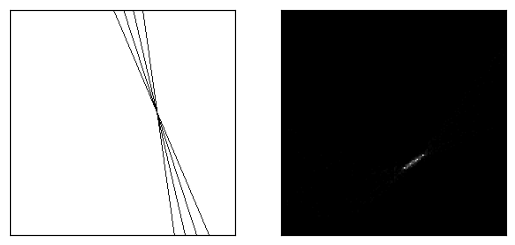

Lines found:
(109.13636363636364, 91.5)
(103.66666666666667, 99.0)


In [32]:
im_len = 256
n_iter = 1000
steps = 80

img = np.full((im_len, im_len), fill_value=255, dtype=np.uint8)

rhos = [40, 40, 40, 40]
thetas = [8*np.pi/180, 13*np.pi/180, 18*np.pi/180, 23*np.pi/180]

for rho, theta in zip(rhos, thetas):
    x_points, y_points = generate_line_points_angle(img.shape[0], img.shape[1], theta=theta, offset=rho, thickness=1, noise=0)
    img[x_points, y_points] = 0

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

radon = random_radon_transformation(img, rho_steps=steps, theta_steps=steps * 2, n_iter=n_iter)

plt.subplot(1, 2, 2), plt.imshow(radon, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

rhos, thetas = detect_straight_lines(img, rho_steps=steps, theta_steps=steps * 2, cluster_ident_thres=0.2, cluster_size_thres=2, n_iter=n_iter)

print("Lines found:", *zip(rhos, thetas), sep="\n")
